# PROCESAMIENTO DE LENGUAJE NATURAL (NLP)

## 1) Data Assemble
### - Encontrando la ruta actual

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#ls -l drive/My\ Drive/'2019-2 #CICLO_10♥'/'TESIS 2'/DATA/

In [2]:
directorio = 'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'
#directorio = os.getcwd()

directorio

'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

### TF-IDF - Train & Test

In [4]:
a = "Titulo_vector.csv"
b = os.path.join(directorio,a)
data = pd.read_csv(b, sep =",")
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,Y
0,0.030578,0.289452,-0.307815,-0.105102,0.087299,0.164573,-0.368324,-0.366834,0.24765,-0.041259,-0.381749,-0.025744,-0.363636,0.068494,-0.091748,-0.220645,-0.21082,0.205808,0.108183,0.461468,0.203543,0.028054,0.117886,0.383926,0.449128,-0.428715,-0.309548,0.007019,0.042096,-0.36322,0.172578,0.360472,-0.531175,0.493852,0.296196,-0.111525,-0.014967,-0.32732,0.130972,-0.485411,...,-0.130923,0.084963,0.430682,0.540623,0.010922,-0.145461,-0.54381,-0.176763,-0.003619,-0.430275,-0.123933,0.343806,-0.214988,0.270458,0.316817,-0.016573,-0.097015,-0.272175,-0.14154,-0.222153,-0.38022,0.217208,-0.150334,-0.026605,-0.124889,-0.100213,-0.259665,-0.021366,-0.527254,-0.301832,-0.222297,0.329979,-0.149263,-0.406581,0.149747,-0.078316,-0.356129,-0.485951,0.099392,1.0
1,0.030578,0.289452,-0.307815,-0.105102,0.087299,0.164573,-0.368324,-0.366834,0.24765,-0.041259,-0.381749,-0.025744,-0.363636,0.068494,-0.091748,-0.220645,-0.21082,0.205808,0.108183,0.461468,0.203543,0.028054,0.117886,0.383926,0.449128,-0.428715,-0.309548,0.007019,0.042096,-0.36322,0.172578,0.360472,-0.531175,0.493852,0.296196,-0.111525,-0.014967,-0.32732,0.130972,-0.485411,...,-0.130923,0.084963,0.430682,0.540623,0.010922,-0.145461,-0.54381,-0.176763,-0.003619,-0.430275,-0.123933,0.343806,-0.214988,0.270458,0.316817,-0.016573,-0.097015,-0.272175,-0.14154,-0.222153,-0.38022,0.217208,-0.150334,-0.026605,-0.124889,-0.100213,-0.259665,-0.021366,-0.527254,-0.301832,-0.222297,0.329979,-0.149263,-0.406581,0.149747,-0.078316,-0.356129,-0.485951,0.099392,0.0
2,0.030578,0.289452,-0.307815,-0.105102,0.087299,0.164573,-0.368324,-0.366834,0.24765,-0.041259,-0.381749,-0.025744,-0.363636,0.068494,-0.091748,-0.220645,-0.21082,0.205808,0.108183,0.461468,0.203543,0.028054,0.117886,0.383926,0.449128,-0.428715,-0.309548,0.007019,0.042096,-0.36322,0.172578,0.360472,-0.531175,0.493852,0.296196,-0.111525,-0.014967,-0.32732,0.130972,-0.485411,...,-0.130923,0.084963,0.430682,0.540623,0.010922,-0.145461,-0.54381,-0.176763,-0.003619,-0.430275,-0.123933,0.343806,-0.214988,0.270458,0.316817,-0.016573,-0.097015,-0.272175,-0.14154,-0.222153,-0.38022,0.217208,-0.150334,-0.026605,-0.124889,-0.100213,-0.259665,-0.021366,-0.527254,-0.301832,-0.222297,0.329979,-0.149263,-0.406581,0.149747,-0.078316,-0.356129,-0.485951,0.099392,1.0
3,0.030578,0.289452,-0.307815,-0.105102,0.087299,0.164573,-0.368324,-0.366834,0.24765,-0.041259,-0.381749,-0.025744,-0.363636,0.068494,-0.091748,-0.220645,-0.21082,0.205808,0.108183,0.461468,0.203543,0.028054,0.117886,0.383926,0.449128,-0.428715,-0.309548,0.007019,0.042096,-0.36322,0.172578,0.360472,-0.531175,0.493852,0.296196,-0.111525,-0.014967,-0.32732,0.130972,-0.485411,...,-0.130923,0.084963,0.430682,0.540623,0.010922,-0.145461,-0.54381,-0.176763,-0.003619,-0.430275,-0.123933,0.343806,-0.214988,0.270458,0.316817,-0.016573,-0.097015,-0.272175,-0.14154,-0.222153,-0.38022,0.217208,-0.150334,-0.026605,-0.124889,-0.100213,-0.259665,-0.021366,-0.527254,-0.301832,-0.222297,0.329979,-0.149263,-0.406581,0.149747,-0.078316,-0.356129,-0.485951,0.099392,0.0
4,0.030578,0.289452,-0.307815,-0.105102,0.087299,0.164573,-0.368324,-0.366834,0.24765,-0.041259,-0.381749,-0.025744,-0.363636,0.068494,-0.091748,-0.220645,-0.21082,0.205808,0.108183,0.461468,0.203543,0.028054,0.117886,0.383926,0.449128,-0.428715,-0.309548,0.007019,0.042096,-0.36322,0.172578,0.360472,-0.531175,0.493852,0.296196,-0.111525,-0.014967,-0.32732,0.130972,-0.485411,...,-0.130923,0.084963,0.430682,0.540623,0.010922,-0.145461,-0.54381,-0.176763,-0.003619,-0.430275,-0.123933,0.343806,-0.214988,0.270458,0.316817,-0.016573,-0.097015,-0.272175,-0.14154,-0.222153,-0.38022,0.217208,-0.150334,-0.026605,-0.124889,-0.100213,-0.259665,-0.021366,-0.527254,-0.301832,-0.222297,0.3

In [5]:
y_data = data.ix[:,data.columns =='Y']
y_data.head()

,Y
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [6]:
a = "tabla_tfidf_vector.csv"
b = os.path.join(directorio,a)
tabla_tfidf_vector = pd.read_csv(b, delimiter=',')
tabla_tfidf_vector.head()

,aa,aah,abc,abe,abieaudesa,abiertas,abiertos,ability,ablasofy,able,aboard,aboutlastnight,abran,abrazar,abrazos,abre,abriga,abrigado,abrigando,abriguemos,abril,abrilsalo,abrir,abroad,abs,absolute,absolutely,abstract,abundante,aburidos,abynaverysmom,ac,aca,acaba,acabaron,acabo,acaestajulio,acai,acaibowl,acarameladas,...,𝖊𝖝𝖈𝖊𝖑𝖊𝖓𝖈𝖊,𝖋𝖊𝖈𝖙,𝖋𝖔𝖗,𝖌𝖎𝖗𝖑𝖘,𝖎𝖈𝖔𝖓𝖎𝖈,𝖕𝖚𝖗,𝖘𝖎𝖘𝖙𝖊𝖗,𝖘𝖚𝖒𝖊𝖗𝖙𝖎𝖒𝖊,𝖘𝖜𝖊𝖙,𝖙𝖍𝖊,𝘢𝘭,𝘢𝘯𝘥,𝘢𝘯𝘺,𝘣𝘶𝘴𝘺,𝘤𝘰𝘮𝘧𝘰𝘳𝘵𝘢𝘣𝘭𝘦,𝘤𝘰𝘯𝘧𝘪𝘥𝘦𝘯𝘵,𝘥𝘢𝘺,𝘧𝘦𝘭,𝘩𝘪𝘨𝘩,𝘩𝘶𝘨𝘴,𝘪𝘯,𝘫𝘦𝘢𝘯𝘴,𝘮𝘢𝘬𝘦,𝘰𝘧,𝘰𝘯,𝘱𝘢𝘪𝘳,𝘱𝘦𝘳𝘧𝘦𝘤𝘵𝘭𝘺,𝘱𝘭𝘢𝘤𝘦𝘴,𝘳𝘦𝘢𝘥𝘺,𝘳𝘪𝘨𝘩𝘵,𝘴𝘰,𝘵𝘢𝘬𝘦,𝘵𝘩𝘢𝘵,𝘵𝘩𝘦,𝘵𝘰,𝘶𝘴,𝘸𝘢𝘪𝘴𝘵𝘦𝘥,𝙖𝙣,𝙚𝙭𝙖𝙢𝙥𝙡𝙚,𝙝𝙚𝙧𝙚
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tabla_tfidf_vector, y_data,
                                                    test_size = 0.3,
                                                    random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7245, 17782)
(7245, 1)
(3105, 17782)
(3105, 1)


In [8]:
X_train.head()


,aa,aah,abc,abe,abieaudesa,abiertas,abiertos,ability,ablasofy,able,aboard,aboutlastnight,abran,abrazar,abrazos,abre,abriga,abrigado,abrigando,abriguemos,abril,abrilsalo,abrir,abroad,abs,absolute,absolutely,abstract,abundante,aburidos,abynaverysmom,ac,aca,acaba,acabaron,acabo,acaestajulio,acai,acaibowl,acarameladas,...,𝖊𝖝𝖈𝖊𝖑𝖊𝖓𝖈𝖊,𝖋𝖊𝖈𝖙,𝖋𝖔𝖗,𝖌𝖎𝖗𝖑𝖘,𝖎𝖈𝖔𝖓𝖎𝖈,𝖕𝖚𝖗,𝖘𝖎𝖘𝖙𝖊𝖗,𝖘𝖚𝖒𝖊𝖗𝖙𝖎𝖒𝖊,𝖘𝖜𝖊𝖙,𝖙𝖍𝖊,𝘢𝘭,𝘢𝘯𝘥,𝘢𝘯𝘺,𝘣𝘶𝘴𝘺,𝘤𝘰𝘮𝘧𝘰𝘳𝘵𝘢𝘣𝘭𝘦,𝘤𝘰𝘯𝘧𝘪𝘥𝘦𝘯𝘵,𝘥𝘢𝘺,𝘧𝘦𝘭,𝘩𝘪𝘨𝘩,𝘩𝘶𝘨𝘴,𝘪𝘯,𝘫𝘦𝘢𝘯𝘴,𝘮𝘢𝘬𝘦,𝘰𝘧,𝘰𝘯,𝘱𝘢𝘪𝘳,𝘱𝘦𝘳𝘧𝘦𝘤𝘵𝘭𝘺,𝘱𝘭𝘢𝘤𝘦𝘴,𝘳𝘦𝘢𝘥𝘺,𝘳𝘪𝘨𝘩𝘵,𝘴𝘰,𝘵𝘢𝘬𝘦,𝘵𝘩𝘢𝘵,𝘵𝘩𝘦,𝘵𝘰,𝘶𝘴,𝘸𝘢𝘪𝘴𝘵𝘦𝘥,𝙖𝙣,𝙚𝙭𝙖𝙢𝙥𝙡𝙚,𝙝𝙚𝙧𝙚
6240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Construyendo el modelo

In [0]:
def train_predict_evaluate_model(classifier, train_features, train_labels, test_features, test_labels):
  # build model
  classifier.fit(train_features, train_labels)
  # predict using model
  predictions_train = classifier.predict(train_features)
  prob_train = classifier.predict_proba(train_features)[:,1]

  predictions_test = classifier.predict(test_features)
  prob_test = classifier.predict_proba(test_features)[:,1]

  # evaluate model prediction performance
  print("-------------TRAIN------------------")
  get_metrics(true_labels=train_labels,
  predicted_labels=predictions_train, probabilidad = prob_train)
  print(" ")
  print("--------------TEST-------------------")
  get_metrics(true_labels=test_labels,
  predicted_labels=predictions_test, probabilidad = prob_test)

  return predictions_train, predictions_test, classifier

### METRICAS:
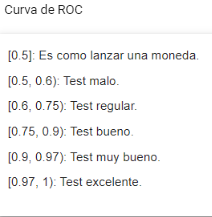

In [0]:
from sklearn import metrics
import numpy as np

def get_metrics(true_labels, predicted_labels, probabilidad):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 2))
  
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 2))
  
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 2))
  
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 2))

  print(" ")
  print("Confusion matrix :")
  print("   Predicho        ")
  print("  NO  /  YES")
  print(metrics.confusion_matrix(true_labels, predicted_labels))

  print(" ")
  #----------------------------- Curva de ROC --------------------------
  # Determine the false positive and true positive rates
  fpr, tpr, _ = metrics.roc_curve(true_labels, probabilidad)

  # Calculate the AUC
  roc_auc = metrics.auc(fpr, tpr)
  print('ROC AUC: %0.2f' % roc_auc)

  #Plot of a ROC curve for a specific class
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()

### REGRESION LOGISTICA

-------------TRAIN------------------
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2724   96]
 [  32 4393]]
 
ROC AUC: 1.00


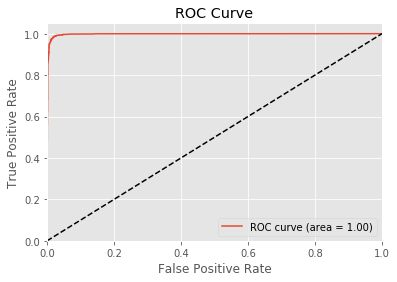

 
--------------TEST-------------------
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1025  216]
 [ 131 1733]]
 
ROC AUC: 0.95


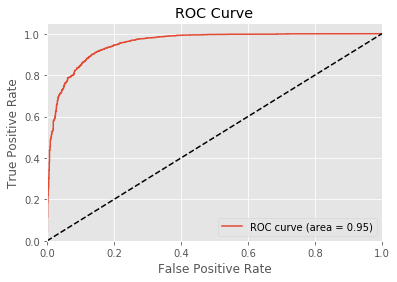

In [0]:
from sklearn.linear_model.logistic import LogisticRegression
logistic = LogisticRegression(C = 10)
logistic_tfidf_predictions_train, logistic_tfidf_predictions_test, clasificador = train_predict_evaluate_model(classifier=logistic,
                                                                                              train_features= X_train,
                                                                                              train_labels=y_train,
                                                                                              test_features = X_test,
                                                                                              test_labels=y_test)

In [0]:
clasificador

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

-------------TRAIN------------------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2672  148]
 [  41 4384]]
 
ROC AUC: 0.99


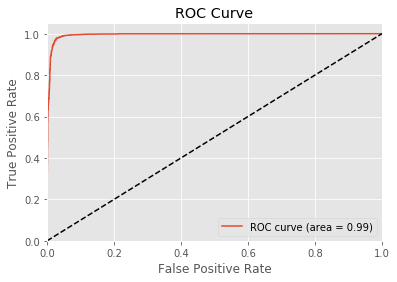

 
--------------TEST-------------------
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1020  221]
 [ 122 1742]]
 
ROC AUC: 0.95


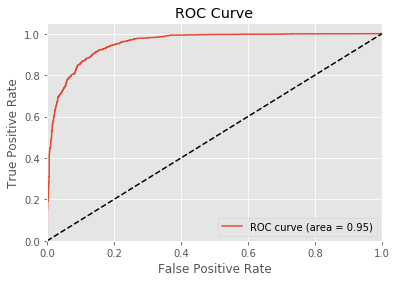

In [0]:
from sklearn.linear_model.logistic import LogisticRegression
logistic = LogisticRegression(C = 5)
logistic_tfidf_predictions_train, logistic_tfidf_predictions_test, clasificador= train_predict_evaluate_model(classifier=logistic,
                                                                                              train_features= X_train,
                                                                                              train_labels=y_train,
                                                                                              test_features = X_test,
                                                                                              test_labels=y_test)

In [0]:
clasificador

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

-------------TRAIN------------------
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2487  333]
 [  93 4332]]
 
ROC AUC: 0.98


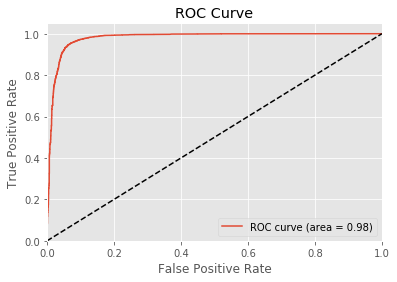

 
--------------TEST-------------------
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 991  250]
 [  98 1766]]
 
ROC AUC: 0.95


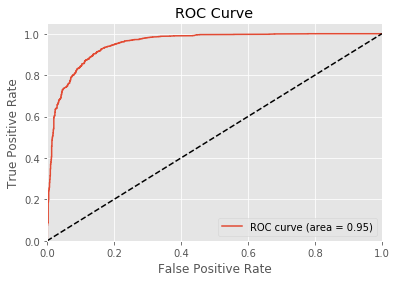

In [0]:
from sklearn.linear_model.logistic import LogisticRegression
logistic = LogisticRegression(C = 1)
logistic_tfidf_predictions_train, logistic_tfidf_predictions_test, clasificador= train_predict_evaluate_model(classifier=logistic,
                                                                                              train_features= X_train,
                                                                                              train_labels=y_train,
                                                                                              test_features = X_test,
                                                                                              test_labels=y_test)

In [0]:
clasificador

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
import joblib
filename = os.path.join(directorio,"model_regresion_tfidf")
joblib.dump(clasificador, filename)

['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/model_regresion_tfidf']

In [0]:
#load saved model
filename = os.path.join(directorio,"model_regresion_tfidf")
mod = joblib.load(filename)
print(mod) 

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### SVM

In [0]:
from sklearn.svm import SVC
%%time
param_grid = {'C':[1, 10, 100, 1000],
              "gamma": [0.001, 0.01, 0.1],
              'kernel':["linear","rbf"]}
Grid_Search = GridSearchCV(SVC(), params)
Grid_Search.fit(X_train, y_train)
# print diagnostic information to the user and grab the
print( "Best Score: %0.3f" % (Grid_Search.best_score_))

In [0]:
svm

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

-------------TRAIN------------------
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2718  102]
 [  22 4403]]
 
ROC AUC: 1.00


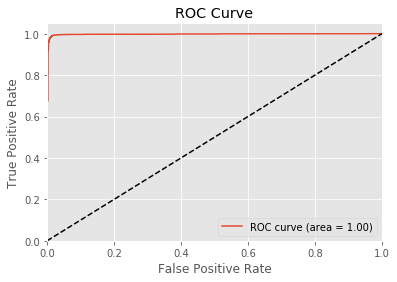

 
--------------TEST-------------------
Accuracy: 0.89
Precision: 0.9
Recall: 0.89
F1 Score: 0.89
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 995  246]
 [  84 1780]]
 
ROC AUC: 0.95


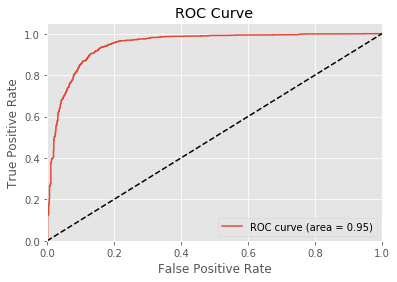

CPU times: user 2h 19min 38s, sys: 1.44 s, total: 2h 19min 39s
Wall time: 2h 19min 49s


In [12]:
%%time
from sklearn.svm import SVC
clf = SVC( C=1, kernel='rbf', 
          random_state=0, probability=True)
clf_tfidf_predictions_train, clf_tfidf_predictions_test, clasificador = train_predict_evaluate_model(classifier=clf,
                                                                                              train_features= X_train,
                                                                                              train_labels=y_train,
                                                                                              test_features = X_test,
                                                                                              test_labels=y_test)

In [13]:
clasificador

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
import joblib
filename = os.path.join(directorio,"model_svm_tfidf")
joblib.dump(clasificador, filename)

['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/model_svm_tfidf']

In [16]:
#load saved model
filename = os.path.join(directorio,"model_svm_tfidf")
mod = joblib.load(filename)
print(mod) 

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


### MLP

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

-------------TRAIN------------------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2685  135]
 [  50 4375]]
 
ROC AUC: 0.99


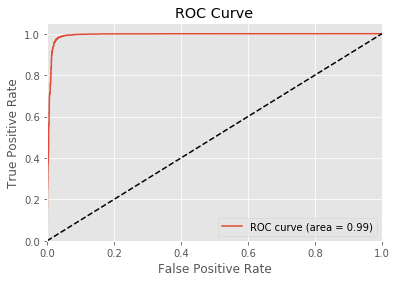

 
--------------TEST-------------------
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1044  197]
 [ 136 1728]]
 
ROC AUC: 0.96


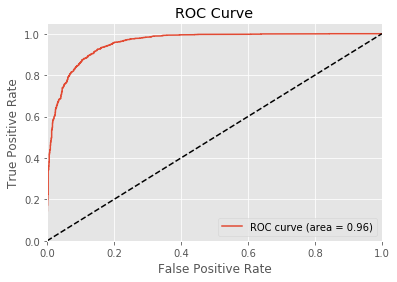

CPU times: user 2min 13s, sys: 18.4 s, total: 2min 31s
Wall time: 1min 22s


In [0]:
%%time
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(3),
                    activation='logistic', max_iter = 100)
mlp_tfidf_predictions_train, mlp_tfidf_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)

-------------TRAIN------------------
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2740   80]
 [  47 4378]]
 
ROC AUC: 1.00


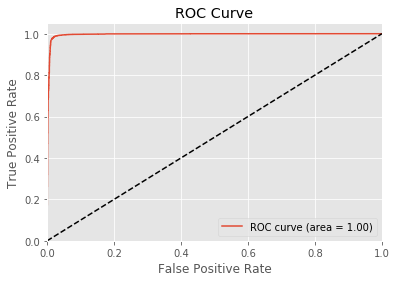

 
--------------TEST-------------------
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1057  184]
 [ 166 1698]]
 
ROC AUC: 0.96


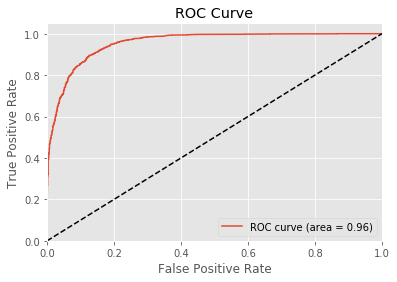

CPU times: user 2min 14s, sys: 18.9 s, total: 2min 33s
Wall time: 1min 23s


In [0]:
%%time
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(3,3),
                    activation='logistic', max_iter = 100)
mlp_tfidf_predictions_train, mlp_tfidf_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)

In [0]:
clasificador

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

-------------TRAIN------------------
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2754   66]
 [  31 4394]]
 
ROC AUC: 0.99


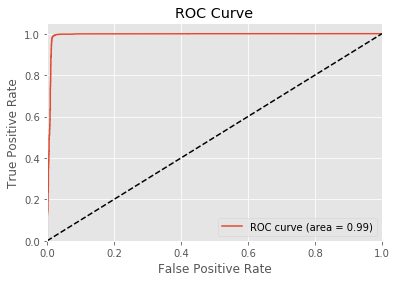

 
--------------TEST-------------------
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1059  182]
 [ 168 1696]]
 
ROC AUC: 0.95


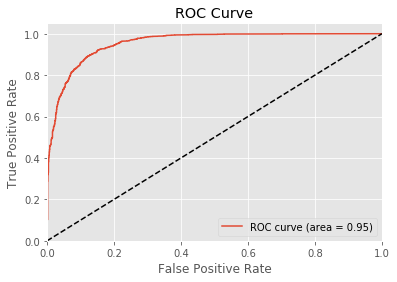

CPU times: user 2min 14s, sys: 19.4 s, total: 2min 33s
Wall time: 1min 23s


In [0]:
%%time
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(3,3,3),
                    activation='logistic', max_iter = 100)
mlp_tfidf_predictions_train, mlp_tfidf_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)


-------------TRAIN------------------
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[2774   46]
 [  32 4393]]
 
ROC AUC: 0.99


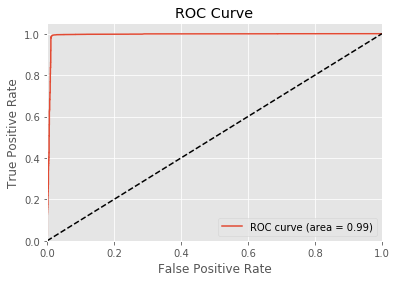

 
--------------TEST-------------------
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1066  175]
 [ 190 1674]]
 
ROC AUC: 0.95


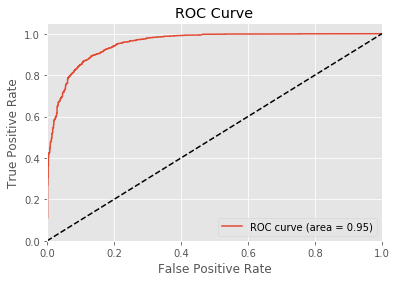

CPU times: user 2min 14s, sys: 19.6 s, total: 2min 34s
Wall time: 1min 23s


In [0]:
%%time
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(3,3,3,3),
                    activation='logistic', max_iter = 100)
mlp_tfidf_predictions_train, mlp_tfidf_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)

In [0]:
clasificador

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
import joblib
filename = os.path.join(directorio,"model_mlp_tfidf")
joblib.dump(clasificador, filename)

['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/model_mlp_tfidf']

In [17]:
#load saved model
filename = os.path.join(directorio,"model_mlp_tfidf")
mod = joblib.load(filename)
print(mod) 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


# Vectores Caracteristicos

## Predicciones

In [0]:
def preprocess(text):
    ## apply all preprocess
    
    text = text.lower()
    text = remover_num(text)
    text = elimina_tildes(text)
    text = tokens(text)
    text = remover_stopwords_eng(text)
    text = remover_stopwords_spani(text)
    text = lemma(text)
    text = join_all(text)
    
    return text

In [0]:
sent = ["los líderes tienen la capacidad de guiar a los equipos a un buen trabajo",
        "la inteligencia artificial es parte de la innovación",
        "la política es un factor muy importante para la sociedad"]

## create pandas DF
text_df = pd.DataFrame({"txt":sent})
text_df

,txt
0,los líderes tienen la capacidad de guiar a los equipos a un buen trabajo
1,la inteligencia artificial es parte de la innovación
2,la política es un factor muy importante para la sociedad


In [0]:
## clean the text
text_df["txt_clean"] = text_df["txt"].apply(preprocess)
text_df

,txt,txt_clean
0,los líderes tienen la capacidad de guiar a los equipos a un buen trabajo,liderar capacidad guiar equipo bueno trabajar
1,la inteligencia artificial es parte de la innovación,inteligencia artificial partir innovacion
2,la política es un factor muy importante para la sociedad,politica factor importante sociedad


In [0]:
## apply the TF-IDF object
text_tf_idf = tf_idf.transform(text_df["txt_clean"])
text_tf_idf

<3x16854 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [0]:
## realizar las predicciones
CV.predict(text_tf_idf)

array(['No', 'No', 'Yes'], dtype=object)